# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
# Encontrando o valor mínimo da coluna 'munResLat' no DataFrame df
faixa_min = df['munResLat'].min()

# Encontrando o valor máximo da coluna 'munResLat' no DataFrame df
faixa_max = df['munResLat'].max()

# Criando uma série chamada 'faixa_total' contendo os valores da coluna 'munResLat' excluindo valores NaN
faixa_total = df['munResLat'].dropna()

# Dividindo os dados em faixas usando a função pd.cut, especificando as bordas das faixas (faixa_min, -10.50000, faixa_max) 
# e incluindo o valor mais baixo (include_lowest=True)
faixa_lat = pd.cut(faixa_total, [faixa_min, -10.50000, faixa_max], include_lowest=True)

# Verificando a quantidade de valores ausentes (NaN) na série 'faixa_lat'
faixa_lat.isna().sum()

0

In [7]:
# Exibindo os valores únicos na série 'faixa_lat', que representa as faixas em que os valores da coluna 'munResLat' foram divididos
faixa_lat.unique()

[(-13.501, -10.5], (-10.5, -8.769]]
Categories (2, interval[float64, right]): [(-13.501, -10.5] < (-10.5, -8.769]]

In [9]:
# Criando uma tabela dinâmica (pivot table) chamada 'pivot1' utilizando as colunas 'QTDPARTNOR' e 'QTDPARTCES'
# as faixas definidas anteriormente em 'faixa_lat'. A tabela inclui as estatísticas sum, mean, min, max, median, std e var.
pivot1 = df.pivot_table(['QTDPARTNOR', 'QTDPARTCES'],
                        faixa_lat,
                        aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
                       )

# Exibindo a tabela dinâmica resultante
pivot1


sum                  mean                   min  \
                 QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResLat                                                                 
(-13.501, -10.5]     7095.0     5800.0   0.552570   0.452242        0.0   
(-10.5, -8.769]      6041.0     8771.0   0.487335   0.711759        0.0   

                                   max                median             \
                 QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResLat                                                                 
(-13.501, -10.5]        0.0       12.0       41.0        0.0        0.0   
(-10.5, -8.769]         0.0       12.0       40.0        0.0        0.0   

                        std                   var             
                 QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResLat                                                     
(-13.501, -10.5]   0.753036   1.123426   0.567062   1.262087  
(-10.5, -8.769]    0.737899   1.279042   0.544495   1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Encontrando o valor mínimo da coluna 'munResArea' no DataFrame df
faixa_min = df['munResArea'].min()

# Encontrando o valor máximo da coluna 'munResArea' no DataFrame df
faixa_max = df['munResArea'].max()

# Crieando uma série chamada 'faixa_total' contendo os valores da coluna 'munResArea' excluindo valores NaN
faixa_total = df['munResArea'].dropna()

# Dividindo os dados em faixas usando a função pd.cut, especificando as bordas das faixas (faixa_min, 3000, faixa_max) 
# e incluindo o valor mais baixo (include_lowest=True)
faixa_area = pd.cut(faixa_total, [faixa_min, 3000, faixa_max], include_lowest=True)

# Verificando a quantidade de valores ausentes (NaN) na série 'faixa_area'
faixa_area.isna().sum()

0

In [11]:
# Agrupando o DataFrame df pelas faixas criadas anteriormente em 'faixa_area'
# Calculando as várias estatísticas (soma, média, mínimo, máximo, mediana, desvio padrão e variância)
# para as colunas 'QTDPARTNOR' e 'QTDPARTCES' dentro de cada faixa
df.groupby(faixa_area)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDPARTNOR                                        \
                                    sum      mean  min   max median       std   
munResArea                                                                      
(459.97700000000003, 3000.0]     1912.0  0.371334  0.0  10.0    0.0  0.856441   
(3000.0, 34096.394]             12659.0  0.632982  0.0  41.0    0.0  1.278932   

                                       QTDPARTCES                              \
                                   var        sum      mean  min   max median   
munResArea                                                                      
(459.97700000000003, 3000.0]  0.733490     2952.0  0.572981  0.0   5.0    0.0   
(3000.0, 34096.394]           1.635668    10184.0  0.507070  0.0  12.0    0.0   

                                                  
                                   std       var  
munResArea                                        
(459.97700000000003, 3000.0]  0.749368  0.561553  
(3000.0, 34096.394]           0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
# Criando uma série chamada 'faixa_total' contendo os valores da coluna 'munResAlt' excluindo valores NaN
faixa_total = df['munResAlt'].dropna()

# Dividindo os dados em faixas usando a função pd.qcut, especificando o número desejado de quantis (3 neste caso)
faixa_alt = pd.qcut(faixa_total, 3)

In [13]:
# Agrupando o DataFrame df pelas faixas criadas anteriormente em 'faixa_alt'
# Calculando várias estatísticas (soma, média, mínimo, máximo, mediana, desvio padrão e variância)
# para as colunas 'QTDPARTNOR' e 'QTDPARTCES' dentro de cada faixa
df.groupby(faixa_alt)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
(84.999, 111.0]     6271.0  0.802534  0.0  40.0    0.0  1.377551  1.897646   
(111.0, 177.0]      5336.0  0.574319  0.0  14.0    0.0  1.139346  1.298109   
(177.0, 595.0]      2964.0  0.368519  0.0  41.0    0.0  1.065716  1.135751   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
(84.999, 111.0]     3522.0  0.451654  0.0  12.0    0.0  0.736842  0.542936  
(111.0, 177.0]      4788.0  0.510611  0.0  12.0    0.0  0.744376  0.554095  
(177.0, 595.0]      4826.0  0.598685  0.0   5.0    0.0  0.750578  0.563368

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
# Dicionário que associa municípios a suas respectivas regiões em Rondônia
regioes = {
    "Rio Crespo": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Buritis": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Vale do Anari": "Jaru",
    "Theobroma": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Porto Velho": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Candeias do Jamari": "Porto Velho",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Alvorada d'Oeste": "Ji-Paraná", 
    "Costa Marques": "Ji-Paraná", 
    "Ji-Paraná": "Ji-Paraná", 
    "Mirante da Serra": "Ji-Paraná", 
    "Nova União": "Ji-Paraná", 
    "Ouro Preto do Oeste": "Ji-Paraná", 
    "Presidente Médici": "Ji-Paraná", 
    "São Francisco do Guaporé": "Ji-Paraná", 
    "São Miguel do Guaporé": "Ji-Paraná", 
    "Seringueiras": "Ji-Paraná", 
    "Teixeirópolis": "Ji-Paraná", 
    "Urupá": "Ji-Paraná", 
    "Vale do Paraíso": "Ji-Paraná", 
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

C:\Users\Miriam Yochebel\AppData\Local\Temp\ipykernel_1588\3335428232.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  map1.groupby([regioes, "DTNASC"]).mean().unstack().T.plot(figsize=[15,5])


<Axes: xlabel='None,DTNASC'>

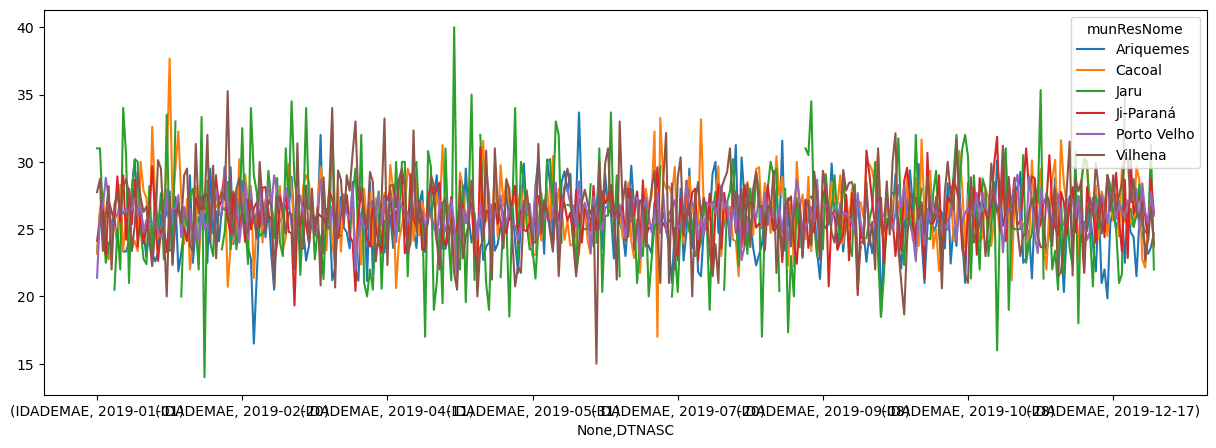

In [15]:
# Criando um novo DataFrame chamado 'map1', selecionando as colunas 'IDADEMAE', 'munResNome' e 'DTNASC' do DataFrame original df
map1 = df.loc[:, ["IDADEMAE", "munResNome", "DTNASC"]]

# Convertendo a coluna 'DTNASC' para o formato datetime e adicione-a como uma nova coluna 'DTNASCT' no DataFrame 'map1'
map1.loc[:, "DTNASCT"] = pd.to_datetime(map1["DTNASC"])

# Definindo 'munResNome' como índice do DataFrame 'map1'
map1 = map1.set_index("munResNome")

# Agrupando o DataFrame 'map1' utilizando a região associada a cada município ('regioes') e a data de nascimento ('DTNASC')
# Calculando a média para cada grupo resultante e desagrupe a tabela (unstack) para melhor visualização
# Transpondo a tabela (T) e plote um gráfico de linhas
map1.groupby([regioes, "DTNASC"]).mean().unstack().T.plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [16]:
# Utilizando a função read_html do pandas para extrair tabelas de uma página web
# Neste caso, a tabela é extraída da página da Wikipedia que contém o IDH-M dos municípios de Rondônia
idh_rond = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M", header=1)

# Acessando a primeira tabela extraída e remova as linhas indesejadas (linhas 0, 1, 2, 10, 47, 57, 58)
idh_rond = idh_rond[0].drop([0, 1, 2, 10, 47, 57, 58])

# Redefinindo os índices do DataFrame para garantir uma numeração sequencial
idh_rond = idh_rond.reset_index(drop=True)

# Exibindo o DataFrame resultante
idh_rond

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613
5,6,Ariquemes,0.702,0.716,0.806,0.600
6,7,Rolim de Moura,0.700,0.709,0.808,0.598
7,8,Cerejeiras,0.692,0.688,0.799,0.602
8,9,Jaru,0.689,0.687,0.825,0.577
9,10,Colorado do Oeste,0.685,0.676,0.814,0.584


In [17]:
# Convertendo as colunas relevantes ('IDH municipal', 'IDH renda', 'IDH longevidade', 'IDH educação') para o tipo de dado float64
idh_rond[["IDH municipal", "IDH renda", "IDH longevidade", "IDH educação"]] = idh_rond[["IDH municipal", "IDH renda", 
          "IDH longevidade", "IDH educação"]].astype('float64')

# Exibindo informações sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
idh_rond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Posição          52 non-null     object 
 1   Município        52 non-null     object 
 2   IDH municipal    52 non-null     float64
 3   IDH renda        52 non-null     float64
 4   IDH longevidade  52 non-null     float64
 5   IDH educação     52 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.6+ KB


In [19]:
# Dicionário que associa intervalos de valores de IDH a classes descritivas
idh_class = {
    "(0.8, 1.0]": "IDH muito alto",
    "(0.7, 0.8]": "IDH alto",
    "(0.6, 0.7]": "IDH médio",
    "(0.5, 0.6]": "IDH baixo",
    "(0.0, 0.5]": "IDH muito baixo",
}

In [20]:
# Criando faixas de valores para a coluna 'IDH municipal' usando a função pd.cut
# Os intervalos são definidos como [0, 0.5, 0.6, 0.7, 0.8, 1], incluindo o menor valor possível (include_lowest=True)
faixas_idh = pd.cut(idh_rond['IDH municipal'], [0, 0.5, 0.6, 0.7, 0.8, 1], include_lowest=True)

# Exibindo os valores únicos resultantes das faixas criadas
faixas_idh.unique()

[(0.7, 0.8], (0.6, 0.7], (0.5, 0.6]]
Categories (5, interval[float64, right]): [(-0.001, 0.5] < (0.5, 0.6] < (0.6, 0.7] < (0.7, 0.8] < (0.8, 1.0]]

In [21]:
# Adicionando uma nova coluna chamada 'IDH classificacao' ao DataFrame 'idh_rond'
# Essa coluna recebe os valores de 'faixas_idh', que representam a classificação do IDH para cada município
idh_rond["IDH classificacao"] = faixas_idh

# Convertendo os valores da coluna 'IDH classificacao' para o tipo de dado string
idh_rond["IDH classificacao"] = idh_rond["IDH classificacao"].astype("string")

# Exibindo o valor da 'IDH classificacao' na primeira posição (índice 0)
idh_rond["IDH classificacao"][0]

'(0.7, 0.8]'

In [22]:
# Definindo a coluna 'IDH classificacao' como índice do DataFrame 'idh_rond', criando um novo DataFrame 'idh_group'
idh_group = idh_rond.set_index('IDH classificacao')

# Agrupando o DataFrame 'idh_group' utilizando o dicionário 'idh_class' como mapeamento
# Calculando a média para cada grupo resultante, utilizando a função mean()
idh_group.groupby(idh_class).mean()

C:\Users\Miriam Yochebel\AppData\Local\Temp\ipykernel_1588\538579953.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  idh_group.groupby(idh_class).mean()


,IDH municipal,IDH renda,IDH longevidade,IDH educação
IDH classificacao,,,,
IDH alto,0.718500,0.732500,0.811167,0.624500
IDH baixo,0.591333,0.627222,0.764444,0.431667
IDH médio,0.644784,0.653649,0.791135,0.519514


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
# Utilizando a função read_html do pandas para extrair tabelas de uma página web
# Neste caso, a tabela é extraída da página da Wikipedia que contém o IFDM dos municípios de Rondônia
ifdm_rond = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM", header=0)

# Acessando a primeira tabela extraída e remova as linhas indesejadas (linhas 0, 1, 2, 29, 56, 57)
ifdm_rond = ifdm_rond[0].drop([0, 1, 2, 29, 56, 57])

# Redefinindo os índices do DataFrame para garantir uma numeração sequencial
ifdm_rond = ifdm_rond.reset_index(drop=True)

# Convertendo a coluna 'IFDM Consolidado (2013)' para o tipo de dado float64
ifdm_rond["IFDM Consolidado (2013)"] = ifdm_rond["IFDM Consolidado (2013)"].astype("float64")

# Exibindo informações sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
ifdm_rond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posição                  52 non-null     object 
 1   Município                52 non-null     object 
 2   IFDM Consolidado (2013)  52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [24]:
# Dicionário que associa intervalos de valores de IFDM a classes descritivas
ifdm_class = {
    "(0.8, 1.0]": "Alto",
    "(0.6, 0.8]": "Moderado",
    "(0.4, 0.6]": "Regular",
    "(0.0, 0.4]": "Baixo",
}

In [25]:
# Criando faixas de valores para a coluna 'IFDM Consolidado (2013)' usando a função pd.cut
# Os intervalos são definidos como [0, 0.4, 0.6, 0.8, 1], incluindo o menor valor possível (include_lowest=True)
faixas_ifdm = pd.cut(ifdm_rond['IFDM Consolidado (2013)'], [0, 0.4, 0.6, 0.8, 1], include_lowest=True)

# Exibindo os valores únicos resultantes das faixas criadas
faixas_ifdm.unique()

[(0.6, 0.8], (0.4, 0.6]]
Categories (4, interval[float64, right]): [(-0.001, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [26]:
# Adicionando uma nova coluna chamada 'IFDM classificacao' ao DataFrame 'ifdm_rond'
# Essa coluna recebe os valores de 'faixas_ifdm', que representam a classificação do IFDM para cada município
ifdm_rond["IFDM classificacao"] = faixas_ifdm

# Convertendo os valores da coluna 'IFDM classificacao' para o tipo de dado string
ifdm_rond["IFDM classificacao"] = ifdm_rond["IFDM classificacao"].astype("string")

# Exibindo o valor da 'IFDM classificacao' na primeira posição (índice 0)
ifdm_rond["IFDM classificacao"][0]

'(0.6, 0.8]'

In [27]:
# Definindo a coluna 'IFDM classificacao' como índice do DataFrame 'ifdm_rond', criando um novo DataFrame 'ifdm_group'
ifdm_group = ifdm_rond.set_index('IFDM classificacao')

# Agrupando o DataFrame 'ifdm_group' utilizando o dicionário 'ifdm_class' como mapeamento
# Calculando a média para cada grupo resultante, utilizando a função mean()
ifdm_group.groupby(ifdm_class).mean()

C:\Users\Miriam Yochebel\AppData\Local\Temp\ipykernel_1588\855402434.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ifdm_group.groupby(ifdm_class).mean()


,IFDM Consolidado (2013)
IFDM classificacao,
Moderado,0.659919
Regular,0.556362


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [28]:
# Utilizando a função read_html do pandas para extrair tabelas de uma página web
# Neste caso, as tabelas contendo informações sobre o PIB dos municípios de Rondônia são extraídas da Wikipedia
pib_rond = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB", header=0)

# Combinando as tabelas extraídas em um único DataFrame usando pd.concat
# Isso é feito porque as informações estão divididas em várias tabelas na página
pib_rond = pd.concat([pib_rond[0], pib_rond[1], pib_rond[2], pib_rond[3], pib_rond[4], pib_rond[5]])

# Redefinindo os índices do DataFrame para garantir uma numeração sequencial
pib_rond = pib_rond.reset_index(drop=True)

# Removendo as linhas indesejadas (linhas 0, 9, 19, 27, 32, 49) e redefina novamente os índices
pib_rond = pib_rond.drop([0, 9, 19, 27, 32, 49]).reset_index(drop=True)

# Removendo as colunas 'Posição.1' e 'Alteração' que não são necessárias para a análise
pib_rond = pib_rond.drop(["Posição.1", "Alteração"], axis=1)

# Removendo os espaços em branco e converta a coluna 'PIB' para o tipo de dado float64
pib_rond['PIB'] = pib_rond['PIB'].str.replace(" ", "").astype("float64")

# Exibindo o DataFrame resultante
pib_rond


,Posição,Município,PIB
0,1,Porto Velho,17912070.0
1,2,Ji-Paraná,3783972.0
2,3,Vilhena,2831175.0
3,4,Ariquemes,2579830.0
4,5,Cacoal,2261644.0
5,6,Jaru,1500890.0
6,7,Rolim de Moura,1283434.0
7,8,Pimenta Bueno,1164877.0
8,9,Guajará-Mirim,893000.0
9,10,Ouro Preto do Oeste,834000.0


In [29]:
# Dicionário que associa intervalos de valores de PIB a classes descritivas
pib_class = {
    "(-0.001, 100000.0]": "Até 100 milhões",
    "(100000.0, 200000.0]": "Acima de 100 milhões",
    "(200000.0, 300000.0]": "Acima de 200 milhões",
    "(300000.0, 500000.0]": "Acima de 300 milhões",
    "(500000.0, 1000000.0]": "Acima de 500 milhões",
    "(1000000.0, 17912070.0]": "Acima de 1 bilhão"
}

In [30]:
# Obtendo o valor máximo da coluna 'PIB'
pib_max = pib_rond['PIB'].max()

# Criando faixas de valores para a coluna 'PIB' usando a função pd.cut
# Os intervalos são definidos com base no valor máximo de 'PIB'
faixas_pib = pd.cut(pib_rond['PIB'], [0, 100000, 200000, 300000, 500000, 1000000, pib_max], include_lowest=True)

# Exibindo os valores únicos resultantes das faixas criadas
faixas_pib.unique()


[(1000000.0, 17912070.0], (500000.0, 1000000.0], (300000.0, 500000.0], (200000.0, 300000.0], (100000.0, 200000.0], (-0.001, 100000.0]]
Categories (6, interval[float64, right]): [(-0.001, 100000.0] < (100000.0, 200000.0] < (200000.0, 300000.0] < (300000.0, 500000.0] < (500000.0, 1000000.0] < (1000000.0, 17912070.0]]

In [31]:
# Adicionando uma nova coluna chamada 'PIB classificacao' ao DataFrame 'pib_rond'
# Essa coluna recebe os valores de 'faixas_pib', que representam a classificação do PIB para cada município
pib_rond['PIB classificacao'] = faixas_pib

# Convertendo os valores da coluna 'PIB classificacao' para o tipo de dado string
pib_rond['PIB classificacao'] = pib_rond['PIB classificacao'].astype("string")

# Exibindo o valor da 'PIB classificacao' na primeira posição (índice 0)
pib_rond['PIB classificacao'][0]

'(1000000.0, 17912070.0]'

In [32]:
# Definindo a coluna 'PIB classificacao' como índice do DataFrame 'pib_rond', criando um novo DataFrame 'pib_group'
pib_group = pib_rond.set_index('PIB classificacao')

# Agrupando o DataFrame 'pib_group' utilizando o dicionário 'pib_class' como mapeamento
# Calculando a média para cada grupo resultante, arredondando para duas casas decimais
pib_group.groupby(pib_class).mean().round(2)

C:\Users\Miriam Yochebel\AppData\Local\Temp\ipykernel_1588\2869633639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pib_group.groupby(pib_class).mean().round(2)


,PIB
PIB classificacao,
Acima de 1 bilhão,4164736.50
Acima de 100 milhões,147844.69
Acima de 200 milhões,211370.25
Acima de 300 milhões,387857.14
Acima de 500 milhões,656777.78
Até 100 milhões,72946.88


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [33]:
# Filtrando o DataFrame 'df' para incluir apenas as linhas em que a coluna 'ESCMAE' é igual a "12 anos ou mais"
# Agrupando as linhas pelo nome do município ('munResNome') e conta a quantidade de ocorrências para cada grupo
# A contagem é realizada na coluna 'ESCMAE', mas poderia ser qualquer outra coluna que não tenha valores nulos
# A função 'sort_values' ordena os resultados em ordem decrescente com base na contagem
# A função 'to_frame' converte a série resultante em um DataFrame
df[df['ESCMAE'] == "12 anos ou mais"].groupby(["munResNome"])['ESCMAE'].count().sort_values(ascending=False).to_frame()

,ESCMAE
munResNome,
Porto Velho,1990
Ji-Paraná,486
Vilhena,471
Cacoal,403
Ariquemes,356
Rolim de Moura,271
Jaru,169
Ouro Preto do Oeste,152
Pimenta Bueno,142


### Insight encontrado:

As quatro principais cidades com o maior número de mães com escolaridade elevada (12 anos ou mais) coincidem com as quatro primeiras cidades que possuem o mais alto Índice de Desenvolvimento Humano (IDH) municipal.